In [1]:
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

* Variables aléatoires (tirer des échantillons depuis une distribution spécifique)

**Dans une distribution uniforme, tous les éléments situés entre la borne minimum (ici 0) et maximum (ici 10) ont une même probabilité d'être tirés.**

In [37]:
# choisi 4 valeurs entre 0 et 10 selon une loi uniforme
np.random.uniform(0, 10, size=4)

array([4.09802714, 0.03019572, 8.85457511, 4.33614163])

**Dans une distribution normale, les éléments situés à proximité de la moyenne ont une probabilité plus grande d'être tirés. La probabilité de tirer des éléments lointains est plus grande si l'écart-type est plus élevé.**

*Avec numpy:*
* `loc` : moyenne souhaitée,
* `scale` : écart-type souhaité.

In [17]:
# choisi 2 valeurs deux fois de suite avec loc = moyenne et sclae = ecart type selon une loi normale
np.random.normal(loc=10, scale=5, size=(2,2))

array([[ 3.10655135,  5.48825551],
       [18.07029692,  7.17699409]])

Il existe pleins d'autres lois statistiques: https://numpy.org/doc/1.16/reference/routines.random.html.

## Bootstrapping, inference, intervalles de confiance

#### Oeufs de pâques

On a reçu une très grande cargaisons d'oeufs de Pâques et on veut déterminer le poids moyen de ces oeufs pour vérifier la qualité de la marchandise. Pour cela on ne va pas peser l'ensemble de la cargaison mais simplement 10 oeufs. 

In [18]:
eggs = [20, 20, 20, 20, 70, 70, 70, 50, 90, 80]

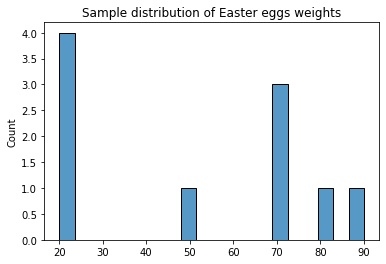

In [19]:
# Sample distribution
sns.histplot(x=eggs, bins=20)
plt.title('Sample distribution of Easter eggs weights')
plt.show()

* Intervalle de confiance

**Formule pour calculer un intervalle de confiance (en faisant l'hypothèse que la distribution est normale et que l'écart-type de la population totale est connu).**

$$IC = \mu \pm z_{95\%}\times \frac{\sigma}{\sqrt{n}}$$

$z_{95\%} = 1.96$ pour une loi normale (voir tables de valeurs).

In [20]:
mu = np.mean(eggs)
sigma = np.std(eggs)
erreur = sigma / np.sqrt(len(eggs))
print('Mean:', mu, '\nStdev:', sigma, '\nStandard error:', erreur)

Mean: 51.0 
Stdev: 27.0 
Standard error: 8.538149682454623


In [21]:
#calculons l'intervalle de confiance à 95%
confidence_interval = (mu - 1.96*erreur, mu + 1.96*erreur)
confidence_interval

(34.26522662238894, 67.73477337761106)

* Intervalle de confiance bootstrappée

In [22]:
sample_mean = np.mean(eggs)
sample_mean

51.0

**On va créer plein d'échantillons issus de l'échantillon de départ et de même taille. Le tirage doit être fait avec remise (un élément qui apparaît une seule fois dans l'échantillon de départ peut donc être sélectionné plusieurs fois).**

In [23]:
bootstrap_means = []
#faisons l'opération 5000 fois
for i in range(5000):
    #créer un nouvel échantillon entre les 10 valeurs de départ dans eggs
    temp_sample = np.random.choice(eggs, replace=True, size=len(eggs))
    #prenons la moyenne de cet échantillon
    temp_mean = np.mean(temp_sample)
    #mettons cette moyenne dans une liste
    bootstrap_means.append(temp_mean)

In [24]:
print(temp_sample)
print(bootstrap_means)

[20 70 70 80 70 70 70 70 80 80]
[59.0, 48.0, 67.0, 58.0, 66.0, 47.0, 59.0, 44.0, 47.0, 64.0, 51.0, 57.0, 55.0, 42.0, 43.0, 77.0, 49.0, 50.0, 52.0, 52.0, 58.0, 58.0, 62.0, 64.0, 49.0, 50.0, 67.0, 48.0, 52.0, 71.0, 56.0, 51.0, 63.0, 50.0, 41.0, 64.0, 65.0, 55.0, 51.0, 46.0, 50.0, 56.0, 49.0, 54.0, 50.0, 43.0, 49.0, 45.0, 50.0, 54.0, 65.0, 51.0, 48.0, 66.0, 46.0, 50.0, 57.0, 52.0, 46.0, 48.0, 56.0, 46.0, 46.0, 55.0, 48.0, 52.0, 55.0, 39.0, 53.0, 56.0, 51.0, 63.0, 53.0, 52.0, 51.0, 48.0, 35.0, 38.0, 33.0, 57.0, 68.0, 54.0, 43.0, 46.0, 55.0, 39.0, 55.0, 55.0, 54.0, 61.0, 40.0, 57.0, 62.0, 31.0, 41.0, 51.0, 45.0, 46.0, 49.0, 53.0, 57.0, 55.0, 42.0, 56.0, 52.0, 43.0, 56.0, 43.0, 55.0, 44.0, 35.0, 70.0, 50.0, 45.0, 57.0, 50.0, 44.0, 42.0, 60.0, 51.0, 65.0, 41.0, 56.0, 67.0, 43.0, 40.0, 48.0, 32.0, 50.0, 47.0, 49.0, 53.0, 67.0, 42.0, 40.0, 44.0, 57.0, 54.0, 51.0, 45.0, 56.0, 56.0, 54.0, 56.0, 47.0, 53.0, 60.0, 61.0, 54.0, 64.0, 54.0, 50.0, 47.0, 42.0, 58.0, 55.0, 45.0, 49.0, 55.0, 53.0, 56.0, 4

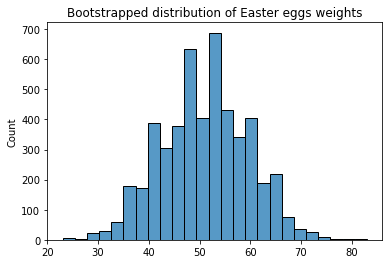

In [25]:
# Bootstrapped distribution 
sns.histplot(x=bootstrap_means, bins=25)
plt.title('Bootstrapped distribution of Easter eggs weights')
plt.show()

**On souhaite avoir un niveau de confiance de 95% : on sélectionne donc les percentiles 2.5% et 97.5% pour avoir 95% des valeurs entre les deux bornes.**

In [26]:
# Confidence interval based on bootstrapped distribution of means
centiles = np.percentile(bootstrap_means, [2.5, 97.5])
print(centiles)
bootstrapped_ci = (round(centiles[0], 2), round(centiles[1], 2))
bootstrapped_ci

[35. 67.]


(35.0, 67.0)

#### Usine de chaussures

Imaginons que l'on possède une usine qui produit des chaussures. On veut être capable de caractériser la taille moyenne des chaussures et être sûr qu'elles répondre à certaines spécificités. Notre usine produit des centaines de chaussures tous les jours, et il est impossible de mesurer la taille de toutes les chaussures. On a accès à un échantillon de 100 chaussures. On va bootstrapper ces 100 tailles de chaussures pour obtenir un intervalle de confiance de 95% de la taille moyenne de nos chaussures. 

Commencons par examiner la liste `shoe_lengths` qui référence les 100 tailles de chaussures observées.

**La fonction suivante permet de simuler la taille de 100 chaussures à partir d'une loi normale (avec $\mu=25$ et $\sigma=0.15$).**

In [27]:
#ici on créé une liste qui initialise 100 tailles de chaussures 
#un peu au hasard pour notre exemple
shoe_lengths = np.random.normal(25, 0.15, 100)
shoe_lengths

array([25.17063831, 24.8487853 , 25.03093209, 25.35786039, 25.30867656,
       24.99793189, 24.9280578 , 25.03102917, 25.05544395, 25.27944589,
       24.83148167, 25.00993001, 25.04896687, 24.94668173, 25.06007194,
       25.20682529, 24.9310893 , 24.67835865, 25.04496464, 24.92772735,
       24.93412   , 24.97319869, 25.10498573, 25.19780034, 24.93886117,
       25.01678637, 24.70688861, 24.90892695, 24.9562683 , 25.1206913 ,
       24.81972431, 24.86764053, 24.78240791, 25.02389378, 25.00826701,
       24.82153983, 24.89371806, 25.29790855, 25.17948972, 25.02063467,
       24.63845447, 25.07875456, 24.98249202, 25.06413688, 25.06974243,
       24.95670134, 25.00801511, 24.73944981, 24.78048468, 24.83004303,
       24.94880113, 24.87217363, 25.01268729, 25.00532097, 24.94004483,
       24.73862159, 24.98377322, 24.91791643, 24.90873001, 24.75172409,
       24.68571359, 24.91792799, 25.04202044, 24.91740865, 24.98133547,
       25.05928873, 25.2057424 , 24.98054801, 24.95132232, 25.07

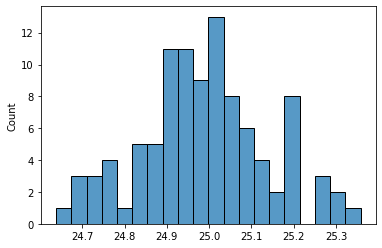

In [28]:
sns.histplot(shoe_lengths, bins=20);

* Intervalle de confiance théorique

In [30]:
mu = np.mean(shoe_lengths)
sigma = np.std(shoe_lengths)
erreur = sigma / np.sqrt(len(shoe_lengths))
print('Mean:', mu, '\nStdev:', sigma, '\nStandard error:', erreur)

confidence_interval = (mu - 1.96*erreur, mu + 1.96*erreur)
confidence_interval

Mean: 24.988374443514143 
Stdev: 0.1513958320734709 
Standard error: 0.01513958320734709


(24.958700860427744, 25.018048026600542)

**La marge d'erreur est beaucoup plus faible qu'avec les œufs alors que le niveau de confiance est similaire (95%). Deux raisons à cela :**
* **L'échantillon est plus grand (100 au lieu de 10),**
* **L'écart-type est plus faible (0.15 au lieu de 27), donc il y a moins d'incertitude.**

* Intervalle de confiance bootstrappé

Encore une fois, le bootstrapping consiste à tirer pleins d'échantillons  de taille `len(shoe_lengths)` (100 ici) de manière aléatoire avec remplacement (par exemple >1000), et ensuite calculer la taille moyenne de chaque échantillon.

In [36]:
bootstrap_means = []
for i in range(1000):
    temp_sample = np.random.choice(shoe_lengths, replace=True, size=len(shoe_lengths))
    temp_mean = np.mean(temp_sample)
    bootstrap_means.append(temp_mean)
    
bootstrap_means

[24.992133047346183,
 24.971467224997554,
 24.986601069484667,
 25.017328260866098,
 25.004949101705435,
 24.98064948347709,
 24.983874128289656,
 24.993489301147388,
 24.980946767011844,
 24.96194590528634,
 24.96518350865894,
 24.99246189723008,
 24.989087300544014,
 24.983211779954626,
 24.988709763539987,
 24.978191501820604,
 24.99145420423188,
 24.994729638748595,
 24.98584622766436,
 24.994072814242415,
 25.006703262817005,
 24.986166789537755,
 25.02613169057551,
 24.982819710232853,
 24.991836267393868,
 24.985925331624653,
 24.98359675239432,
 25.016585995354486,
 24.984384168534298,
 24.9732534580289,
 25.0000254020369,
 24.98805445356809,
 25.03222893340363,
 24.989725628253236,
 24.996854534426017,
 24.96208955061626,
 24.96716283514535,
 24.958971939943062,
 24.987558276242854,
 24.97713229943054,
 24.988755964130515,
 25.006624749718572,
 24.962735651387046,
 25.00160096207314,
 24.975980438051792,
 24.978320160623497,
 24.976939906548004,
 24.97095249881006,
 24.9894088

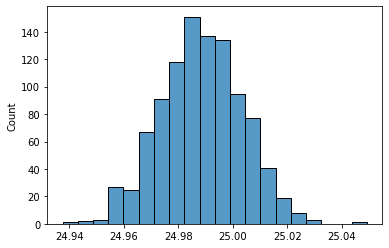

In [37]:
sns.histplot(bootstrap_means, bins=20);

Enfin, on calcule un intervalle de confiance de 95% bootstrappé (`boot_95_ci`) en utilisant `np.percentile()`.

In [33]:
# Ici on en déduit que si on prend n'importe quel échantillon il y a 95% 
# de chance que notre taille moyenne se trouve dans l'intervalle de confiance
# par extension, la population totale est un échantillon, donc la vraie taille
#moyenne a 95% de chance de se trouver dans cette intervalle
boot_95_ci = np.percentile(bootstrap_means, [2.5, 97.5])
print("95% Bootstrapped CI = {}".format(boot_95_ci))

95% Bootstrapped CI = [24.9591274 25.0190371]
